In [1]:
# Import relevant packages and constants
from astropy import units as u
from astropy.constants.si import c, G, m_p, M_sun, hbar,h, k_B
from astropy.cosmology import WMAP9 as cosmo
import math
import matplotlib.pyplot as plt
import numpy as np
#c = speed of light
#m_p =  rest mass of proton
#G =  universal gravatational constant
#M_sun = Solar mass
# Hubble's constant = cosmo.H(0)  
# hbar = Reduced Planck's constant

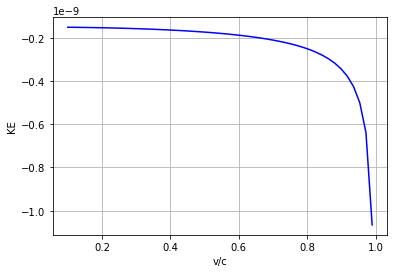

In [2]:
# plot the kinetic energy for different mass
ke = lambda v: -m_p*c**2/np.sqrt(1-(v**2/c**2))
v = np.linspace(.1,.99)*c
plt.plot(v/c,ke(v),'b')
plt.xlabel('v/c')
plt.ylabel('KE')
plt.grid(True)
plt.show()

In [3]:
m_bh = 1.e9 * M_sun 
a_bh = (16 * math.pi * G**2 * m_bh**2) / c**4
t_h = 1/cosmo.H(0).decompose() 
flux = m_bh / (t_h * a_bh * m_p)
print("Hubble constant = {0:.2e}".format(cosmo.H(0)))
print("Hubble time = {0:.2e}".format(t_h))
print("flux = {0:.2e}".format(flux))

Hubble constant = 6.93e+01 km / (Mpc s)
Hubble time = 4.45e+17 s
flux = 2.44e+22 1 / (m2 s)


In [4]:
rho_de = 7.e-27*u.kg*u.m**-3
m = ((rho_de * hbar**3) / c**3)**(1/4)
print("mass of negatons = {0:.2e}".format(m.decompose()))

mass of negatons = 4.18e-39 kg


In [5]:
n = rho_de / m
print("number density of negatons = {0:.2e}".format(n.decompose()))

number density of negatons = 1.68e+12 1 / m3


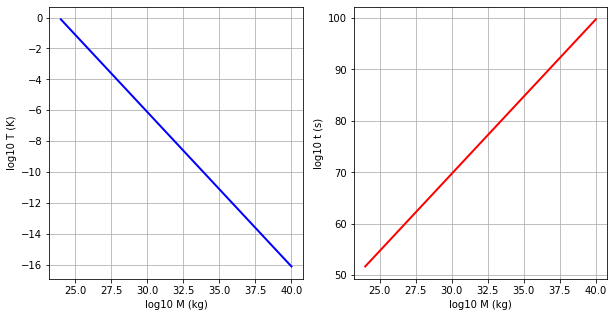

In [6]:
# Calculate the Hawking temperature
T = lambda M: (h*c**3) / (8*np.pi*k_B*G*M)
n = np.linspace(24,40)
M = 10.**n*u.kg

# Calculate the evapouration timescale
t = lambda M: (G**2*M**3)/(hbar*c**4)


# Hawking tempertaure vs Mass
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
ax1.plot(n,np.log10(T(M).value),lw=2,c='b')
ax1.set_xlabel('log10 M (kg)')
ax1.set_ylabel('log10 T (K)')
ax1.grid(True)

# Evapouration timescale vs Mass
ax2.plot(n,np.log10(t(M).value),lw=2,c='r')
ax2.set_xlabel('log10 M (kg)')
ax2.set_ylabel('log10 t (s)')
ax2.grid(True)
plt.show()